In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#use dataframe to import the dataset
df = pd.read_csv("C:/Users/darth/Dropbox/Study/Study/Business Analytics/LA/2019.2.18/quality.csv")
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [3]:
dataset = np.array(df)
X = dataset[:,1:-1]
y = dataset[:,-1]
y = y.astype('int')

In [4]:
#Computing the baseline accuracy
numberRow = df.shape[0]
print(numberRow)
BaseAccuracy = max(np.sum(df['PoorCare'])/numberRow,(np.sum(1-df['PoorCare']))/numberRow)
print(BaseAccuracy)

131
0.7480916030534351


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 88)
print(X_train.shape)
print(y_train)


(98, 12)
[1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]


In [7]:
# Building the logistic regression model
# OfficeVisits + Narcotics
model1 = linear_model.LogisticRegression()
X1 = np.hstack((X_train[:,3].reshape(98, 1),X_train[:,4].reshape(98, 1)))
model1.fit(X1,y_train.astype('int'))
print('Coefficient: ', model1.coef_)
print('Intercept: ', model1.intercept_)

y_pred = model1.predict(X1)
print(y_pred)

y_pred_prob = model1.predict_proba(X1)
print(y_pred_prob)

model1.score(X1, y_train.astype('int'))


Coefficient:  [[ 0.11055466 -0.00233877]]
Intercept:  [-0.6807395]
[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[[0.51717696 0.48282304]
 [0.62176595 0.37823405]
 [0.91609099 0.08390901]
 [0.70038485 0.29961515]
 [0.88682563 0.11317437]
 [0.70659482 0.29340518]
 [0.68293093 0.31706907]
 [0.91609099 0.08390901]
 [0.05588318 0.94411682]
 [0.82770851 0.17229149]
 [0.66167154 0.33832846]
 [0.20286624 0.79713376]
 [0.91609099 0.08390901]
 [0.91609099 0.08390901]
 [0.66882214 0.33117786]
 [0.0147551  0.9852449 ]
 [0.91609099 0.08390901]
 [0.78327186 0.21672814]
 [0.87678054 0.12321946]
 [0.67937536 0.32062464]
 [0.67374583 0.32625417]
 [0.78551136 0.21448864]
 [0.91609099 0.08390901]
 [0.91609099 0.08390901]
 [0.57195799 0.42804201]
 [0.72651928 0.27348072]
 [0.61625033 0.38374967]
 [0.78551136 0.21448864]
 [0.81234236 0.18765764]
 [0.7168

0.7959183673469388

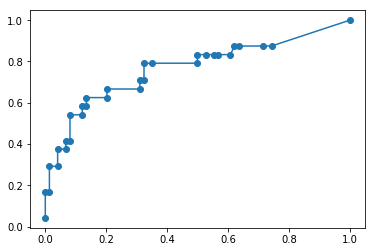

0.767454954954955

In [12]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_train.astype('int'), y_pred_prob[:,1])
#print(fpr)
#print(tpr)
plt.plot(fpr,tpr,marker = 'o')
plt.show()
auc(fpr, tpr)